<a href="https://colab.research.google.com/github/Anuj-Bansal1/project/blob/main/apple_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pathlib
import cv2 as cv
import PIL
import numpy as np
import pandas as pd

In [2]:
data_dir = pathlib.Path(r"/content/drive/MyDrive/Colab Notebooks/datasets/datasets/train")
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/datasets/train')

In [3]:
  apple_scab=list(data_dir.glob("apple_scab/*"))
  black_rot= list(data_dir.glob("black_rot/*"))
  cedar_apple_rust= list(data_dir.glob("cedar_apple_rust/*"))
  healthy= list(data_dir.glob("healthy/*"))

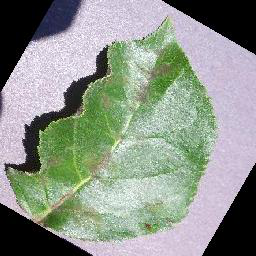

In [4]:
PIL.Image.open(str(apple_scab[1]))

In [12]:
image_seg = {
    "apple_scab" : list(data_dir.glob("apple_scab/*")),
    "black_rot" : list(data_dir.glob("black_rot/*")),
    "cedar_apple_rust": list(data_dir.glob("cedar_apple_rust/*")),
    "healthy": list(data_dir.glob("healthy/*")),
    }

In [13]:
image_label = {
    "apple_scab" : 0,
    "black_rot" : 1,
    "cedar_apple_rust": 2,
    "healthy": 3,
    }

In [14]:
x,y =[],[]

for i,j in image_seg.items():
  h=0
  for image in j:
    img = cv.imread(str(image))
    resized = cv.resize(img,(180,180))
    x.append(resized)
    y.append(image_label[i])
    h+=1
    if (h==200):
      break

In [15]:
x=np.array(x)
y=np.array(y)
x=x/255

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,shuffle = True)

In [17]:
x_train.shape

(640, 180, 180, 3)

In [24]:
from tensorflow import keras
data_aug = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomContrast(0.3)
    ])

In [25]:

model = keras.Sequential([
    data_aug,
    #cnn
    keras.layers.Conv2D(65,input_shape=(180, 180, 3),kernel_size=(3,3),activation ="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(25,kernel_size=(3,3),activation ="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(5,kernel_size=(3,3),activation ="relu"),
    keras.layers.MaxPool2D(),
    #ann
    keras.layers.Flatten(),
    keras.layers.Dense(65,activation ="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(55,activation ="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(35,activation ="relu"),
    keras.layers.Dense(4,activation ="sigmoid"),
    
    
])

In [26]:
model.compile(optimizer= "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [27]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


20/20 [==============================] - 5s 145ms/step - loss: 1.3960 - accuracy: 0.2344
Epoch 2/50
20/20 [==============================] - 3s 138ms/step - loss: 1.3856 - accuracy: 0.2797
Epoch 3/50
20/20 [==============================] - 3s 136ms/step - loss: 1.3739 - accuracy: 0.2844
Epoch 4/50
20/20 [==============================] - 3s 136ms/step - loss: 1.3170 - accuracy: 0.3844
Epoch 5/50
20/20 [==============================] - 3s 138ms/step - loss: 1.2670 - accuracy: 0.4344
Epoch 6/50
20/20 [==============================] - 3s 138ms/step - loss: 1.2183 - accuracy: 0.4781
Epoch 7/50
20/20 [==============================] - 3s 138ms/step - loss: 1.0702 - accuracy: 0.5766
Epoch 8/50
20/20 [==============================] - 3s 138ms/step - loss: 0.9791 - accuracy: 0.5938
Epoch 9/50
20/20 [==============================] - 3s 138ms/step - loss: 0.9269 - accuracy: 0.5938
Epoch 10/50
20/20 [==============================] - 3s 137ms/step - loss: 0.8150 - accuracy: 0.6375
Epoch 11/5

In [28]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 22ms/step - loss: 0.5575 - accuracy: 0.8562


[0.5575183629989624, 0.856249988079071]

In [34]:
pridiction= model.predict(x_test)
final = [np.argmax(i) for i in pridiction]

from sklearn.metrics import classification_report
print(classification_report(y_test,final))

5/5 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.91      0.63      0.75        49
           1       0.88      0.95      0.91        38
           2       0.88      0.91      0.90        33
           3       0.78      1.00      0.88        40

    accuracy                           0.86       160
   macro avg       0.86      0.87      0.86       160
weighted avg       0.87      0.86      0.85       160

